In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0)

In [3]:
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [4]:
# Combination the data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), (np.ones(len(cats_data)))))

In [5]:
# Split data into training and testing
# 0.2 means 20% reserved for testing and 80% for training
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

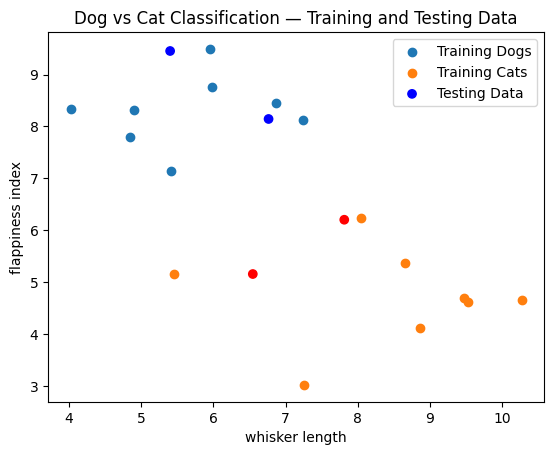

In [6]:
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], label="Training Dogs")
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label="Training Cats")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap="bwr", label="Testing Data")
plt.xlabel("whisker length")
plt.ylabel("flappiness index")
plt.title("Dog vs Cat Classification — Training and Testing Data")
plt.legend()
plt.show()

In [7]:
# Implementing Python code to run the alogorithum
# d == 2 , number of features ( whisker length, flappiness index)

def random_linear_classifier(data_dogs, data_cats, k , d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d) # 01x1 +02x2
        theta0 = np.random.normal() #theta0

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0


# Compute Error Function
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog)+theta0 <= 0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta, x_cat)+theta0 > 0:
            error+=1
    return error

# Cross Validation Function for K-Fold 

In [ ]:
# n_splits = 5 means divided into 5 kfold parts
def cross_validate(data_dogs, data_cats, k_values, d , n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(X_train_fold[y_train_fold == 0], X_train_fold[y_train_fold == 1],k,d)
            
            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1], best_theta_fold, best_theta0_fold))
        
        avg_errors.append(np.mean(errors))
    
    # argmin mean take the LOWEST/Minimum Values 
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Define k values to try
k_values = [ 1, 10, 50, 100, 200]

best_k = cross_validate(dogs_data, cats_data, k_values, d=2)

print(f"Best value of k: {best_k}")



ValueError: not enough values to unpack (expected 3, got 2)

NameError: name 'best_K' is not defined